# Andy Awlasewicz - Final Project
# Understanding Movie Streaming Data

![WatchingMovie](https://media.giphy.com/media/11vsrRFqhjOcKI/giphy.gif "movie")


In [361]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from wordcloud import WordCloud

In [2]:
streamdata = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [4]:
imdbmovies = pd.read_csv('IMDB movies.csv', parse_dates = ['date_published'])

In [5]:
mychecks = pd.read_csv('checked.csv')

In [6]:
top250 = pd.read_csv('imdbs+top+250.csv')

In [7]:
imdbratings = pd.read_csv('IMDB ratings.csv')

In [9]:
streamdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [35]:
streamdata.shape

(16744, 16)

In [11]:
streamdata.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [20]:
streamdata.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
streamdata['Type'].value_counts()

0    16744
Name: Type, dtype: int64

In [19]:
streamdata.drop(columns=['Type'], inplace=True)

In [132]:
# Had originally just used a concatenate column but saw a good example of how to use apply that was similar so applied it here
# https://queirozf.com/entries/pandas-dataframes-apply-examples

#def concat (title, year, director):
#    return str(title) + '-' + str(year) + '-' + str(director)

#streamdata['UniqueID'] = streamdata['Title','Year','Directors'].apply(lambda row: concatenate(row['Title'], row['Year'], row['Directors']), axis=1)

def concat (title, year):
    return str(title) + '-' + str(year) 

streamdata['UniqueID'] = streamdata[['Title','Year']].apply(lambda row: concat(row['Title'], row['Year']), axis=1)

# streamdata['UniqueID'] = streamdata['Title'] + '-' + streamdata['Year'].astype(str) + '-' + streamdata['Directors']

In [133]:
streamdata.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010,1,1
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,The Matrix-1999,1,1
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Avengers: Infinity War-2018,1,1
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985,1,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966",2,1


In [28]:
imdbmovies.shape

(85855, 22)

In [29]:
imdbmovies.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,NaN,NaN,NaN,NaN,13.0,5.0
6,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...","The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,NaN,12.0,9.0
7,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,...,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...","An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,ITL 45000,NaN,NaN,NaN,7.0,5.0
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu",...,"Aristide Demetriade, Constanta Demetriade, Con...",The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,NaN,NaN,NaN,4.0,1.0
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225,$ 30000,NaN,NaN,NaN,8.0,1.0


In [33]:
imdbmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [443]:
#imdbmovies['UniqueID'] = imdbmovies['title'] + '-' + imdbmovies['year'].astype(str) + '-' + imdbmovies['director']


def concat (title, year):
    return str(title) + '-' + str(year) 

imdbmovies['UniqueID'] = imdbmovies[['title','year']].apply(lambda row: concat(row['title'], row['year']), axis=1)


In [467]:
droplist = ['tt8246392', 'tt5260026', 'tt6102104', 'tt3685586', 'tt4087850', 'tt4786222', 'tt6194530', 'tt1967669', 
            'tt3334390', 'tt0451082', 'tt6013186', 'tt1950264', 'tt3381068', 'tt3574352', 'tt5492502', 'tt5525360', 
            'tt9412268', 'tt4594050', 'tt7976502', 'tt0798780', 'tt6998596', 'tt3131050', 'tt5978822', 'tt8530978', 
            'tt9351598', 'tt7106968', 'tt8456680, tt5629964, tt4126394', 'tt5037912', 'tt7259986', 'tt2932532', 
            'tt2991296', 'tt6986606', 'tt4439120', 'tt3343136', 'tt0762115', 'tt7631786', 'tt1967560']

In [468]:
droprows = imdbmovies[imdbmovies['imdb_title_id'].isin(droplist)].index

In [472]:
imdbmovies.drop(droprows, axis=0, inplace=True)

In [473]:
len(imdbmovies)

85819

In [474]:
# https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/
mergedata = pd.merge(left=streamdata, right=imdbmovies,  on='UniqueID', how='left')

In [475]:
mergedata.shape
#something is wrong because there is only supposed to be max 16.7k rows here... 
# duplicates in my imdbmovie dataset creating multiple hits?


(16744, 40)

In [138]:
mergedata.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime', 'UniqueID', 'PlatformCount', 'Quality',
       'imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [476]:
mergedata['UniqueID'].value_counts()

Personal Tailor-2013                                       1
Strike One-2014                                            1
Our City Dreams-2008                                       1
7 Años-2016                                                1
Bill Maher: The Decider-2007                               1
                                                          ..
The Great Smokey Roadblock-1978                            1
Ace Ventura: Pet Detective-1994                            1
Coco-2017                                                  1
Casino Tycoon II-1992                                      1
The Beatles: Eight Days a Week - The Touring Years-2016    1
Name: UniqueID, Length: 16744, dtype: int64

In [213]:
#duplicate checking
mergedata.loc[15056]

ID                                                                   15030
Title                                                   Missed Connections
Year                                                                  2012
Age                                                                    NaN
IMDb                                                                   5.3
Rotten Tomatoes                                                        NaN
Netflix                                                                  0
Hulu                                                                     0
Prime Video                                                              1
Disney+                                                                  0
Directors                                                    Jessica Janos
Genres                                                      Drama,Thriller
Country                                                      United States
Language                 

In [186]:
# DUPLICATES NEED TO DROP
# row 295, 306, 348, 508, 
# 514 & 515 don't match Fury, wrong title used?
# row 748, 974, 995, 1208, 1524
# 1600 & 1601 can't find right match, not sure this movie exists? delete one row and then take out the imdbmovie columns (make null?)
# 1619, 2369
# 4197, 4198, 4199 none of the matches are right. delete 2 take out the imdbmovie columns
# 4221, 4222 neither match is right, delete 1 row and take out imdbmovie columns
# 6028, 6029 neither match is right ....
# 6321, 6322 neither match...
# 6596, 6597 neither match...
# 6908, 8598, 10541
# 12062, 12063 neither match
# 12740, 12741 neither match
# 13659, 13660 neither match
# 14047, 14048 neither match
# 15055, 15056 neither match

In [219]:
#Removing the duplicate rows
mergedata.drop([295, 306, 348, 508, 515, 748, 974, 995, 1208, 1524, 1601, 1619, 2369, 4198, 4199], inplace=True)
mergedata.drop([4222, 6029, 6322, 6597, 6908, 8598, 10541, 12063, 12741, 13660, 14048, 15056], inplace=True)

In [ ]:
#Need to remove the IMDB Datapoints for rows 514, 1600, 4197, 4221, 6028, 6321, 6596, 12062, 12740, 13659, 14047, 15055

In [455]:
mergedata.loc[[295, 306, 348, 508, 515, 748, 974, 995, 1208, 1524, 1601, 1619, 2369, 4198, 4199, 4222, 6029, 6322, 6597, 6908, 8598, 10541, 12063, 12741, 13660, 14048, 15056]].imdb_title_id

295      tt3381068
306      tt3574352
348      tt5492502
508      tt5525360
515      tt9412268
748      tt4594050
974      tt7976502
995      tt0798780
1208     tt6998596
1524     tt3131050
1601     tt5978822
1619     tt8530978
2369     tt9351598
4198     tt7106968
4199     tt8456680
4222     tt5629964
6029     tt4126394
6322     tt5037912
6597     tt7259986
6908     tt2932532
8598     tt2991296
10541    tt6986606
12063    tt4439120
12741    tt3343136
13660    tt0762115
14048    tt7631786
15056    tt1967560
Name: imdb_title_id, dtype: object

In [406]:
len(mergedata.columns)

40

In [407]:
len(imdbmovies.columns)

23

In [413]:
mergedata.loc[514][-22:] = 0

C:\Users\AAWLASEW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [442]:
mergedata.loc[[514, 1600, 4197, 4221, 6028, 6321, 6596, 12062, 12740, 13659, 14047, 15055]].imdb_title_id

514      tt8246392
1600     tt5260026
4197     tt6102104
4221     tt3685586
6028     tt4087850
6321     tt4786222
6596     tt6194530
12062    tt1967669
12740    tt3334390
13659    tt0451082
14047    tt6013186
15055    tt1950264
Name: imdb_title_id, dtype: object

In [438]:
mergedata.loc[[514, 1600, 4197, 4221, 6028, 6321, 6596, 12062, 12740, 13659, 14047, 15055]].budget

514               NaN
1600              NaN
4197              NaN
4221        $ 1000000
6028              NaN
6321     PKR 20000000
6596      EUR 2800000
12062       $ 2500000
12740             NaN
13659             NaN
14047       AUD 30000
15055             NaN
Name: budget, dtype: object

In [422]:
mergedata.loc[514]

ID                                                                     511
Title                                                                Furie
Year                                                                  2019
Age                                                                    18+
IMDb                                                                   5.8
Rotten Tomatoes                                                        95%
Netflix                                                                  1
Hulu                                                                     0
Prime Video                                                              0
Disney+                                                                  0
Directors                                                       David Ayer
Genres                                                    Action,Drama,War
Country                                 United States,China,United Kingdom
Language                 

In [148]:
imdbmovies['UniqueID'].value_counts()

Ride-2018                                     3
Darling-2007                                  3
Split-2016                                    3
I violenti di Rio Bravo-1965                  2
Don Chisciotte-1933                           2
                                             ..
Opstandelsen-2010                             1
Il matrimonio è un affare di famiglia-2007    1
Passione mortale-1989                         1
Destined-2016                                 1
Cómplices-2018                                1
Name: UniqueID, Length: 85736, dtype: int64

In [55]:
netflixmask = streamdata['Netflix'] == 1
disneymask = streamdata['Disney+'] == 1
hulumask = streamdata['Hulu'] == 1
primemask = streamdata['Prime Video'] == 1

In [308]:
type(netflixmask)

pandas.core.series.Series

In [56]:
streamdata[netflixmask]['IMDb'].mean()

6.252963393375944

In [59]:
streamdata[disneymask]['IMDb'].mean()

6.441385435168739

In [58]:
streamdata[hulumask]['IMDb'].mean()

6.1381165919282505

In [57]:
streamdata[primemask]['IMDb'].mean()

5.770910312395029

In [60]:
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [61]:
barmeans = [streamdata[netflixmask]['IMDb'].mean(), streamdata[hulumask]['IMDb'].mean(), streamdata[primemask]['IMDb'].mean(), streamdata[disneymask]['IMDb'].mean() ]

In [62]:
barmeans

[6.252963393375944, 6.1381165919282505, 5.770910312395029, 6.441385435168739]

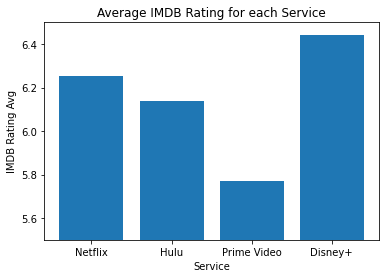

In [90]:
plt.bar(services, barmeans)
plt.xlabel('Service')
plt.ylabel('IMDB Rating Avg')
plt.title('Average IMDB Rating for each Service')
plt.ylim(5.5,6.5)

# https://stackoverflow.com/questions/23591254/python-pandas-matplotlib-annotating-labels-above-bar-chart-columns
# for i, label in enumerate(list(plt.index)):
#    score = df.ix[label]['Score']
#    ax.annotate(str(score), (i, score + 0.2))
    
plt.show()

In [ ]:
#streamdata.groupby(['year'])['movie_id'].count().plot(kind='bar')

In [68]:
streamcount = [len(streamdata[netflixmask]['ID']), len(streamdata[hulumask]['ID']), len(streamdata[primemask]['ID']), len(streamdata[disneymask]['ID']) ]

AttributeError: 'function' object has no attribute 'set_xticklabels'

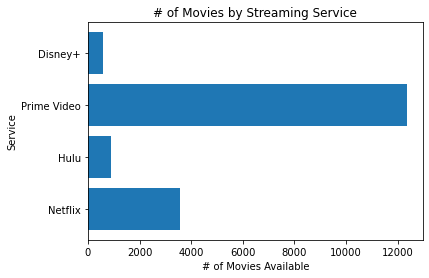

In [316]:
plt.barh(services, streamcount)
plt.ylabel('Service')
plt.xlabel('# of Movies Available')
plt.title('# of Movies by Streaming Service')
plt.show()

In [ ]:
# of movies 7.0 and up on average? 

In [78]:
streamdata[['Netflix','Hulu']]

,Netflix,Hulu
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
16739,0,0
16740,0,0
16741,0,0
16742,0,0


In [81]:
def platformct (netflix, hulu, prime, disney):
    return sum((int(netflix), int(hulu), int(prime)), int(disney))
streamdata['PlatformCount'] = streamdata[['Netflix','Hulu','Prime Video','Disney+']].apply(lambda row: platformct(row['Netflix'], row['Hulu'], row['Prime Video'], row['Disney+']), axis=1)

In [82]:
streamdata.head(10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010-Christopher Nolan,1
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,"The Matrix-1999-Lana Wachowski,Lilly Wachowski",1
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,"Avengers: Infinity War-2018-Anthony Russo,Joe ...",1
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985-Robert Zemeckis,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966-Sergio Leone",2
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,Spider-Man: Into the Spider-Verse-2018-Bob Per...,1
6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,The Pianist-2002-Roman Polanski,2
7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,Django Unchained-2012-Quentin Tarantino,1
8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,Raiders of the Lost Ark-1981-Steven Spielberg,1
9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,Inglourious Basterds-2009-Quentin Tarantino,1


In [83]:
streamdata.PlatformCount.value_counts()

1    16117
2      617
3       10
Name: PlatformCount, dtype: int64

In [240]:
# https://stackoverflow.com/questions/31866304/convert-a-column-in-pandas-to-one-long-string-python-3
# https://stackoverflow.com/questions/42316088/bokeh-attributeerror-dataframe-object-has-no-attribute-tolist
wordcloudtext = '-'.join(streamdata[streamdata['PlatformCount']>2]['Title'].tolist())

In [289]:
streamdata[streamdata['PlatformCount']>2][['Title','PlatformCount']]

,Title,PlatformCount
103,Amy,3
148,The Square,3
340,The Interview,3
497,Blame!,3
610,Evolution,3
1133,No Game No Life: Zero,3
1776,Zapped,3
2017,Mother,3
3960,The Kid,3
4313,Inside Out,3


In [295]:
# Making a dictionary of the Titles where Platform Count is > 2 for the word cloud
# Using dictionary for phrases instead of word cloud only doing 1 word
# https://stackoverflow.com/questions/18012505/python-pandas-dataframe-columns-convert-to-dict-key-and-value
wordcloudtext = streamdata[streamdata['PlatformCount']>2][['Title', 'PlatformCount']]
word_dict = dict(zip(wordcloudtext.Title, wordcloudtext.PlatformCount))
word_dict

{'Amy': 3,
 'The Square': 3,
 'The Interview': 3,
 'Blame!': 3,
 'Evolution': 3,
 'No Game No Life: Zero': 3,
 'Zapped': 3,
 'Mother': 3,
 'The Kid': 3,
 'Inside Out': 3}

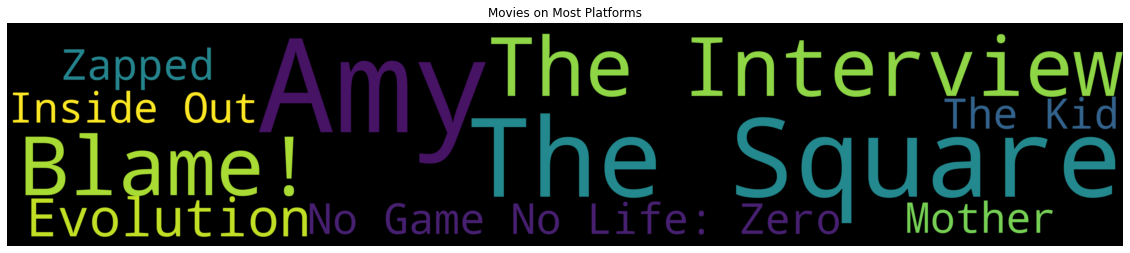

In [306]:
# https://python-graph-gallery.com/260-basic-wordcloud/
# Needed a more complex word cloud that grouped multiple words together
# https://stackoverflow.com/questions/58286251/how-can-i-group-multi-word-terms-when-creating-a-python-wordcloud

wordcloud = WordCloud(width=5000, height=1000, margin=0).generate_from_frequencies(word_dict)

# Making word cloud bigger
# https://stackoverflow.com/questions/28786534/increase-resolution-with-word-cloud-and-remove-empty-border
plt.figure( figsize=(20,10) )

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Movies on Most Platforms")
plt.margins(x=0, y=0)
plt.show()

In [105]:
streamdata['IMDb'].astype(str)

0        8.8
1        8.7
2        8.5
3        8.5
4        8.8
        ... 
16739    6.2
16740    4.7
16741    5.7
16742    6.6
16743    nan
Name: IMDb, Length: 16744, dtype: object

In [371]:
def qualityrate(rating):
    
    if rating >= 7.0:
        return 'High'
    elif rating <= 3.0:
        return 'Low'
    elif rating < 7 and rating > 3:
        return 'OK'
    else:
        return 'None'
streamdata['Quality'] = streamdata['IMDb'].apply(lambda row: qualityrate(row))
#streamdata['UniqueID'] = streamdata['Title','Year','Directors'].apply(lambda row: concatenate(row['Title'], row['Year'], row['Directors']), axis=1)

In [373]:
streamdata['Quality'].value_counts()

OK      11834
High     3795
None      571
Low       544
Name: Quality, dtype: int64

In [377]:
highqual = streamdata['Quality'] == 'High'
lowqual = streamdata['Quality'] == 'Low'
qual = streamdata['Quality'] != 'None'

In [378]:
streamdata[qual]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Inception-2010,1,High
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,The Matrix-1999,1,High
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Avengers: Infinity War-2018,1,High
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Back to the Future-1985,1,High
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,"The Good, the Bad and the Ugly-1966",2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,NaN,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0,Whispers: An Elephant's Tale-2000,1,OK
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,The Ghosts of Buxley Hall-1980,1,OK
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,The Poof Point-2001,1,OK
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN,Sharks of Lost Island-2013,1,OK


In [ ]:
streamcount = [len(streamdata[netflixmask]['ID']), len(streamdata[hulumask]['ID']), len(streamdata[primemask]['ID']), len(streamdata[disneymask]['ID']) ]

In [379]:
streamdata[netflixmask & qual]['Quality'].value_counts()

OK      2396
High    1011
Low       35
Name: Quality, dtype: int64

In [338]:
len(streamdata[netflixmask].IMDb.notnull())

3560

In [337]:
streamdata[streamdata.IMDb.isnull()]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,UniqueID,PlatformCount,Quality
2137,2138,Making Unorthodox,2020,NaN,NaN,NaN,1,0,0,0,Marlene Melchior,"Short,Documentary",Germany,English,NaN,Making Unorthodox-2020,1,0
2355,2356,Little Singham aur Kaal ka Mahajaal,2018,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN,NaN,NaN,Little Singham aur Kaal ka Mahajaal-2018,1,0
2479,2480,Night on Earth: Shot in the Dark,2020,NaN,NaN,NaN,1,0,0,0,Alex Minton,Documentary,NaN,NaN,59.0,Night on Earth: Shot in the Dark-2020,1,0
2552,2553,What the F* Is Going On?,2019,NaN,NaN,NaN,1,0,0,0,Bob Spiers,Comedy,NaN,NaN,NaN,What the F* Is Going On?-2019,1,0
2720,2721,Uncovered,2019,NaN,NaN,NaN,1,0,0,0,Jim McBride,Thriller,"United Kingdom,Spain,France",English,103.0,Uncovered-2019,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,16209,Cracking the Prophetic Code,2000,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,Cracking the Prophetic Code-2000,1,0
16209,16210,Behind the Race to the Moon,2002,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,51.0,Behind the Race to the Moon-2002,1,0
16210,16211,Late War Fighters of the Luftwaffe,1997,NaN,NaN,NaN,0,0,1,0,NaN,"Documentary,History,War",NaN,NaN,45.0,Late War Fighters of the Luftwaffe-1997,1,0
16211,16212,Beneath Alcatraz,1999,NaN,NaN,NaN,0,0,1,0,NaN,NaN,NaN,NaN,NaN,Beneath Alcatraz-1999,1,0


In [333]:
len(streamdata[netflixmask]['IMDb'].notnull())

3560

In [380]:
streamdata[hulumask & qual]['Quality'].value_counts()

OK      649
High    234
Low       9
Name: Quality, dtype: int64

In [381]:
streamdata[primemask & qual]['Quality'].value_counts()

OK      8872
High    2529
Low      507
Name: Quality, dtype: int64

In [382]:
streamdata[disneymask & qual]['Quality'].value_counts()

OK      378
High    181
Low       4
Name: Quality, dtype: int64

In [ ]:
x = np.arange(len(services))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

f_pivot = pd.pivot_table(
	df,
	values="page_views",
	index="year",
	columns="month",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

In [383]:
df1 = streamdata[netflixmask].copy()
df2 = streamdata[hulumask].copy()
df3 = streamdata[primemask].copy()
df4 = streamdata[disneymask].copy()

In [384]:
df1['Service'] = 'Netflix'
df2['Service'] = 'Hulu'
df3['Service'] = 'Prime'
df4['Service'] = 'Disney'

In [385]:
flattened = [df1, df2, df3, df4]
newflatdf = pd.concat(flattened)

In [386]:
newflatdf.shape

(17381, 19)

<AxesSubplot:xlabel='Service'>

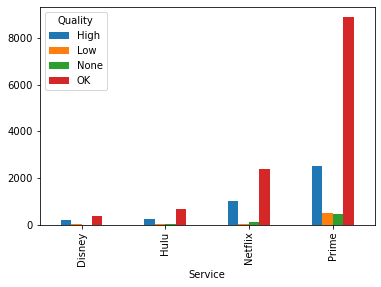

In [390]:
newflatdf.groupby(['Service'])['Quality'].value_counts().unstack().plot.bar()


Text(0, 0.5, 'Movie Count')

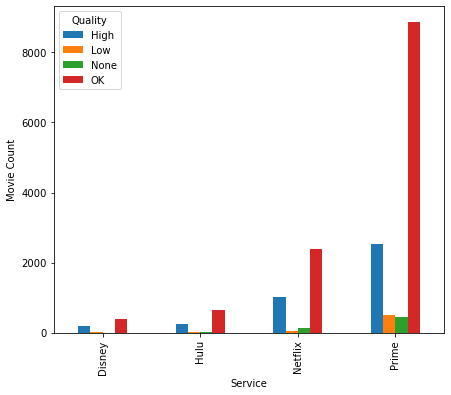

In [397]:
thepivot = pd.pivot_table(newflatdf,
               values = "ID",
               index = "Service",
               columns = "Quality",
               aggfunc = 'count'
              )

ax = thepivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Service")
ax.set_ylabel("Movie Count")

In [ ]:
newflatdf2 = newflatdf[qual]

In [ ]:
thepivot = pd.pivot_table(newflatdf,
               values = "ID",
               index = "Service",
               columns = "Quality",
               aggfunc = 'count'
              )

ax = thepivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Service")
ax.set_ylabel("Movie Count")

In [ ]:
bins = [1970, 1980, 1990, 2000, 2010, 2020]